In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns

In [10]:
df = pd.read_csv('../../datasets/diamond_pricing.csv')
print(df.shape)
df.head()

(1000, 3)


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [15]:
df.describe(include='all')

,Paleonium,Pressure,Price
count,1000.00000,1000.000000,1000.000000
mean,98.96400,10122.469000,2007.448439
std,58.72689,5825.896633,667.841772
min,0.00000,15.000000,-377.141912
25%,49.75000,5124.750000,1636.484951
50%,96.00000,10126.000000,2020.206588
75%,150.00000,15227.500000,2447.708656
max,200.00000,19993.000000,3419.116331


In [16]:
x = df[['Paleonium','Pressure']]
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size =.2, random_state=0)

In [40]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(trainx,trainy)
score = regr.score(testx,testy)*100
score

95.60540679867778

In [41]:
ypred = regr.predict(x)

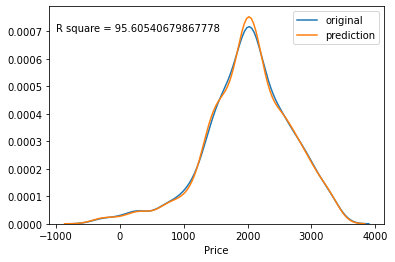

In [42]:
sns.distplot(y,hist=False,label='original')
sns.distplot(ypred,hist=False,label='prediction')
plt.text(-1000,0.0007,f'R square = {score}')
plt.legend()
plt.show()

In [43]:
import pickle

def save_regr_model(path,regr):
    with open(path,'wb') as f:
        pickle.dump(regr,f)
    return path    

In [44]:
save_regr_model('../../models/diamond_price_DT_predictor.pkl',regr)

'../../models/diamond_price_DT_predictor.pkl'

In [45]:
regr.feature_importances_

array([0.41533914, 0.58466086])